# 5.8 专题：决策树与随机森林

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject
  return f(*args, **kwds)
d:\python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## 5.8.1 随机森林的诱因：决策树

决策树的每个节点都根据一个特征的阈值将数据分成两组

1. 创建一棵决策树

In [6]:
from sklearn.datasets import make_blobs

In [7]:
x, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

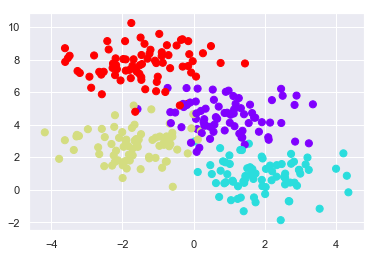

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=50, cmap='rainbow')

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
tree = DecisionTreeClassifier().fit(x, y)

In [4]:
def visualize_classifier(model, x, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # 画出训练数据
    ax.scatter(x[:, 0], x[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 用评论器拟合数据
    model.fit(x, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # 为结果生成彩色图
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, vmin=y.min(), vmax=y.max(), zorder=1)
    ax.set(xlim=xlim, ylim=ylim)

- x or y 的值只可能是x或y. x为真就是x, x为假就是y
- x and y 的值只可能是x或y. x为真就是y, x为假就是x

In [8]:
s = None

In [12]:
a = s or 2

In [13]:
a

1

In [11]:
s = 1

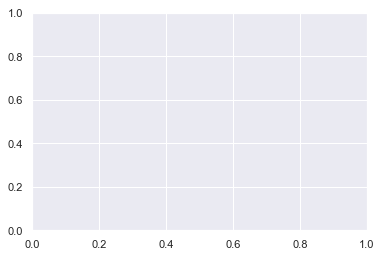

In [14]:
fig, ax = plt.subplots()

- *的意思是去掉括号

In [17]:
aaa = ax.get_xlim()

In [18]:
aaa

(0.0, 1.0)

In [20]:
np.linspace(*aaa, num=20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [21]:
print(*aaa)

0.0 1.0


- np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
- np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。

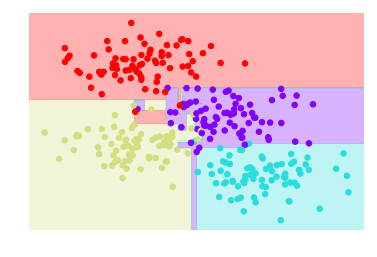

In [32]:
visualize_classifier(DecisionTreeClassifier(), x, y)

In [36]:
path = 'D:/Python3Space/BookStudy/book3/PythonDataScienceHandbook/notebooks/helpers_05_08.py'

In [38]:
import helpers_05_08

d:\python35\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


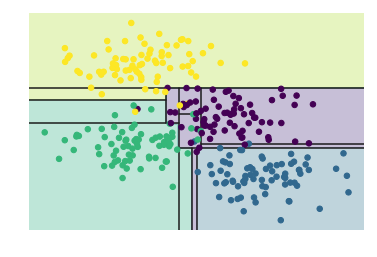

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

In [39]:
helpers_05_08.plot_tree_interactive(x, y)

In [41]:
x.shape

(300, 2)

2. 决策树与过拟合

决策树对数据随机子集训练的结果

d:\python35\lib\site-packages\matplotlib\contour.py:1004: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


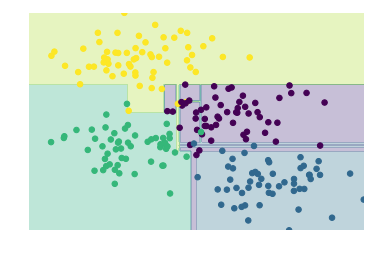

In [47]:
helpers_05_08.randomized_tree_interactive(x, y)

## 5.8.2 评估器集成算法：随机森林

使用BaggingClassifier元评估器来实现装袋分类器

In [1]:
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.ensemble import BaggingClassifier

In [9]:
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)

max_samples：用于训练每个基本评估器的从X中抽取的样本数量

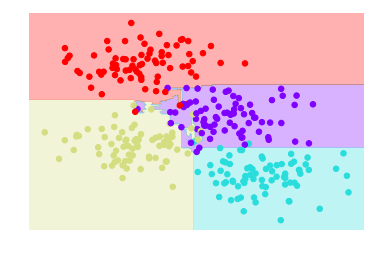

In [11]:
visualize_classifier(bag, x, y)

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model = RandomForestClassifier(n_estimators=100, random_state=0)

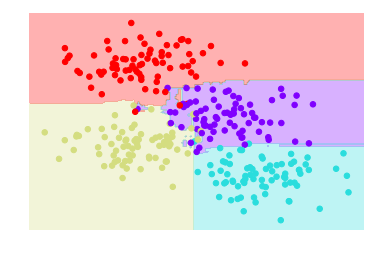

In [14]:
visualize_classifier(model, x, y)

## 3.8.3 随机森林回归

In [15]:
rng = np.random.RandomState(42)

In [16]:
x = 10 * rng.rand(200)

In [18]:
def model(x, sigma=0.3):
    # oscillation：振荡
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))
    
    return slow_oscillation + fast_oscillation + noise

In [19]:
y = model(x)

<ErrorbarContainer object of 3 artists>

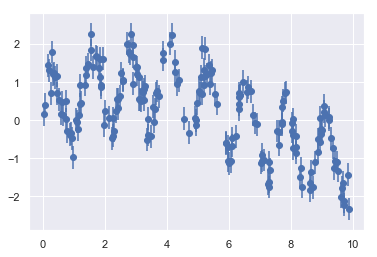

In [20]:
plt.errorbar(x, y, 0.3, fmt='o')

通过随机森林回归器，可以获得下面的最佳拟合曲线。

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
forest = RandomForestRegressor(200)

In [23]:
forest.fit(x[:, None], y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

In [28]:
plt.errorbar??

Signature:
plt.errorbar(
    x,
    y,
    yerr=None,
    xerr=None,
    fmt='',
    ecolor=None,
    elinewidth=None,
    capsize=None,
    barsabove=False,
    lolims=False,
    uplims=False,
    xlolims=False,
    xuplims=False,
    errorevery=1,
    capthick=None,
    hold=None,
    data=None,
    **kwargs,
)
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

Parameters
----------
x, y : scalar or array-like
    The data positions.

xerr, yerr : scalar or array-like, shape(N,) or shape(2,N), optional
    The errorbar sizes:

    - scalar: Symmetric +/- values for all data points.
    - shape(N,): Symmetric +/-values for each data point.
    - shape(2,N): Separate - and + values for each bar. First row
        contains the lower errors, the second row co

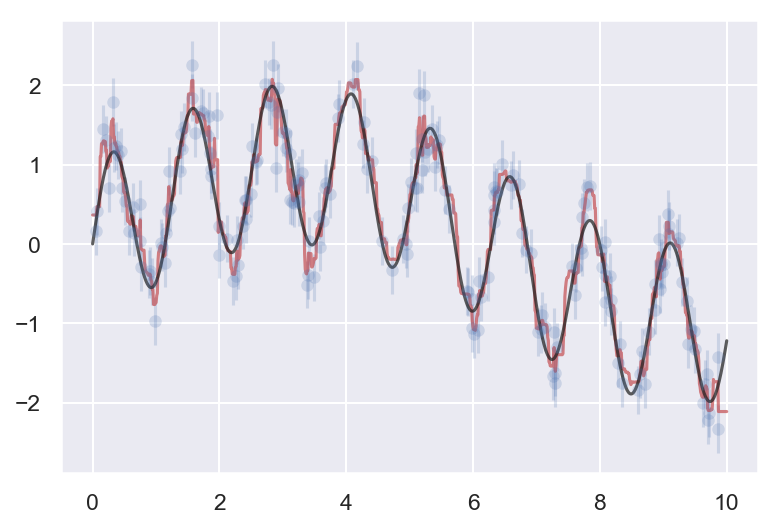

In [34]:
plt.figure(dpi=150)
plt.errorbar(x, y, 0.3, fmt='o', alpha=0.2, markeredgecolor='none')
plt.plot(xfit, yfit, '-r', alpha=0.7)
plt.plot(xfit, ytrue, '-k', alpha=0.7)

## 5.8.4 案例：用随机森林识别手写数字

In [35]:
from sklearn.datasets import load_digits

In [36]:
digits = load_digits()

In [38]:
digits.keys()

dict_keys(['target_names', 'DESCR', 'data', 'target', 'images'])

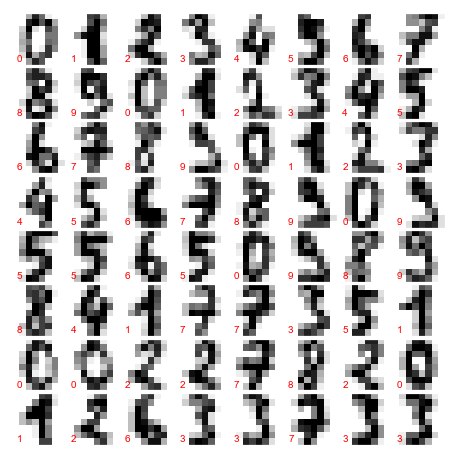

In [41]:
# 设置图形对象
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# 画数字：每个数字是8像素x8像素
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # 用target值给图像作标注
    ax.text(0, 7, str(digits.target[i]), color='red')

用随机森林快速对数字进行分类

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=0)

In [44]:
model = RandomForestClassifier(n_estimators=1000)

In [45]:
model.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
ypred = model.predict(xtest)

查看分类器的分类结果报告：

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      0.98      0.98        45
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



F1 = 2*(Precision*Recall)/(Precision+Recall)：能综合精准率和召回的评价参数。

为了更好的验证结果，画出混淆矩阵。

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
mat = confusion_matrix(ytest, ypred)

Text(123.75,0.5,'predicted label')

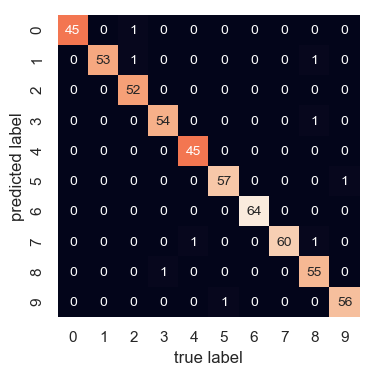

In [52]:
plt.figure(dpi=100)
sns.heatmap(mat.T, square=True, annot=True, fmt='o', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

主要缺点在于结果不太容易解释。